Enter Number of vertices in a Polygon :- 4
Start entering Points :- 
Enter Cordinates of  1  Vertex :- 
3 4
Enter Cordinates of  2  Vertex :- 
1 1
Enter Cordinates of  3  Vertex :- 
1 7
Enter Cordinates of  4  Vertex :- 
2 8


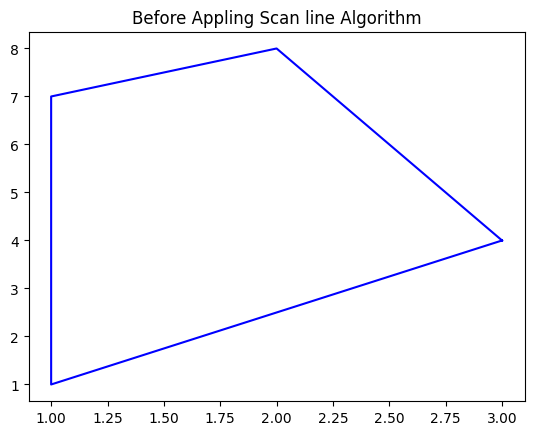

neighbour of ( 1 , 1 ) is  1 , 7  -  3 , 4
Appending  1 , 7
Appending  3 , 4
neighbour of ( 3 , 4 ) is  1 , 1  -  2 , 8
Appending  2 , 8
neighbour of ( 1 , 7 ) is  2 , 8  -  1 , 1
Appending  2 , 8
neighbour of ( 2 , 8 ) is  3 , 4  -  1 , 7
1 1
1 1
------------
1.0 2
1.6666666666666665 2
------------
1.0 3
2.333333333333333 3
------------
updating l
1.0 4
3 4
------------
1.0 5
2.75 5
------------
1.0 6
2.5 6
------------
1.0 7
2.25 7
------------


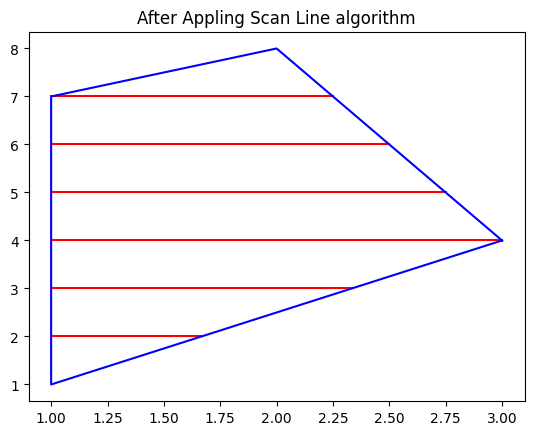

In [24]:
                                   
import matplotlib.pyplot as plt    
from graphics import *
import numpy


def draw_graph(V):
    x=[]
    y=[]
    for i in V:
        x.append(i[0])
        y.append(i[1])
    x.append(V[0][0])
    y.append(V[0][1])
    plt.title("Before Appling Scan line Algorithm")
    plt.plot(x,y,c="blue",label="Polygon")
    plt.show()


count=int(input("Enter Number of vertices in a Polygon :- "))
V=[]
print("Start entering Points :- ")
for i in range(count):
    print("Enter Cordinates of ",i+1," Vertex :- ")
    x,y=input().split()
    V.append((int(x),int(y)))
draw_graph(V)

ylist=[]
for i in V:
    ylist.append(i[1])
    
                    
        
        

def get_another_Points(V,x,y,count):
    for i in range(len(V)):
        if(V[i][0]==x) and (V[i][1]==y):
            if count ==1:
                if i==len(V)-1:
                    return (V[0][0],V[0][1])
                else:
                    return (V[i+1][0],V[i+1][1])
            else:
                if i!=len(V)-1:
                    return (V[i+1][0],V[i+1][1],V[i-1][0],V[i-1][1])
                elif i==0:
                    return (V[i+1][0],V[i+1][1],V[len(V)-1][0],V[len(V)-1][1])
                else:
                    return (V[0][0],V[0][1],V[i-1][0],V[i-1][1])
                    
        
        
get=[]
visited=[]
def ifvisited(V,x,y):
    for i in V:
        if(x==i[0] and y==i[1] and i[2]==2):
            return 2
        if(x==i[0] and y==i[1] and i[2]==1):
            return 1
    return 0

for i in range(min(ylist),max(ylist)+1):
    for j in range(len(V)):
        if i==V[j][1] :
            x=V[j][0]
            y=V[j][1]
            visited.append((x,y,2))
            if ifvisited(visited,x,y)==1:
                visited.remove((x,y,1))
            
            x1,y1,x2,y2=get_another_Points(V,x,y,2)
            print("neighbour of (",x,",",y,") is ",x1,",",y1," - ",x2,",",y2)
            if ifvisited(visited,x1,y1)!=2:  
                if ifvisited(visited,x1,y1)==1:
                    visited.append((x1,y1,2))
                    visited.remove((x1,y1,1))
                print("Appending ",x1,",",y1)
                visited.append((x1,y1,1))
                if(y1>y):
                    get.append((y1,x,((x-x1)/(y-y1)),i))
                else:
                    get.append((y,x1,((x-x1)/(y-y1)),i))

                    
            if ifvisited(visited,x2,y2)!=2:
                if ifvisited(visited,x2,y2)==1:
                    visited.append((x2,y2,2))
                    visited.remove((x2,y2,1))
                print("Appending ",x2,",",y2)
                visited.append((x2,y2,1))
                if(y2>y):
                    get.append((y2,x,((x-x2)/(y-y2)),i))
                else:
                    get.append((y,x2,((x-x2)/(y-y2)),i))

            
            
def get_points(get,V,ylist):
    j=0
    f=0
    k=get[j]
    l=get[j+1]
    for i in range(min(ylist),max(ylist)):
        for m in range(len(get)):
            if i==get[m][3] and i!=min(ylist):
                j=m
                if(k[0]==min([k[0],l[0],get[j][0]])) and k[0]!=get[j][0]:
                    print("updating k")
                    k=get[j]
                elif(l[0]==min([k[0],l[0],get[j][0]])) and l[0]!=get[j][0]:
                    print("updating l")
                    l=get[j]
                else:
                    print("not")
                
                  
        print(k[1],i)
        print(l[1],i)
        plt.plot([k[1],l[1]],[i,i],c="red")
        print("------------")
        temp1=k[1]+k[2]
        k=(k[0],temp1,k[2],k[3])
        temp1=l[1]+l[2]
        l=(l[0],temp1,l[2],l[3])
        if j!=len(get)-1:
            get[j]=k
            get[j+1]=l
    x=[]
    y=[]
    
    V.append((V[0][0],V[0][1]))
    for i in V:
        x.append(i[0])
        y.append(i[1])
    plt.plot(x,y,c="blue",label="Polygon")
    plt.title("After Appling Scan Line algorithm")
    plt.show()
            
    
get_points(get,V,ylist)